# Predicting Obesity using Deep Learning

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import KFold



2024-02-05 19:50:08.992850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 19:50:08.992960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 19:50:09.147115: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
train.head(15)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
test.head(15)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


## Preprocessiong and Visualizing data

In [4]:
df = train

# Remove id
df = df.drop(['id'], axis=1)
# Convert categorical variables to numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
# Convert the output variable to numerical using Label Encoding
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,False,...,True,False,False,True,False,False,False,False,True,False


In [5]:
print(df.dtypes)

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
NObeyesdad                              int64
Gender_Female                            bool
Gender_Male                              bool
family_history_with_overweight_no        bool
family_history_with_overweight_yes       bool
FAVC_no                                  bool
FAVC_yes                                 bool
CAEC_Always                              bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_no                                 bool
SMOKE_yes                                bool
SCC_no                            

### Correlation plot

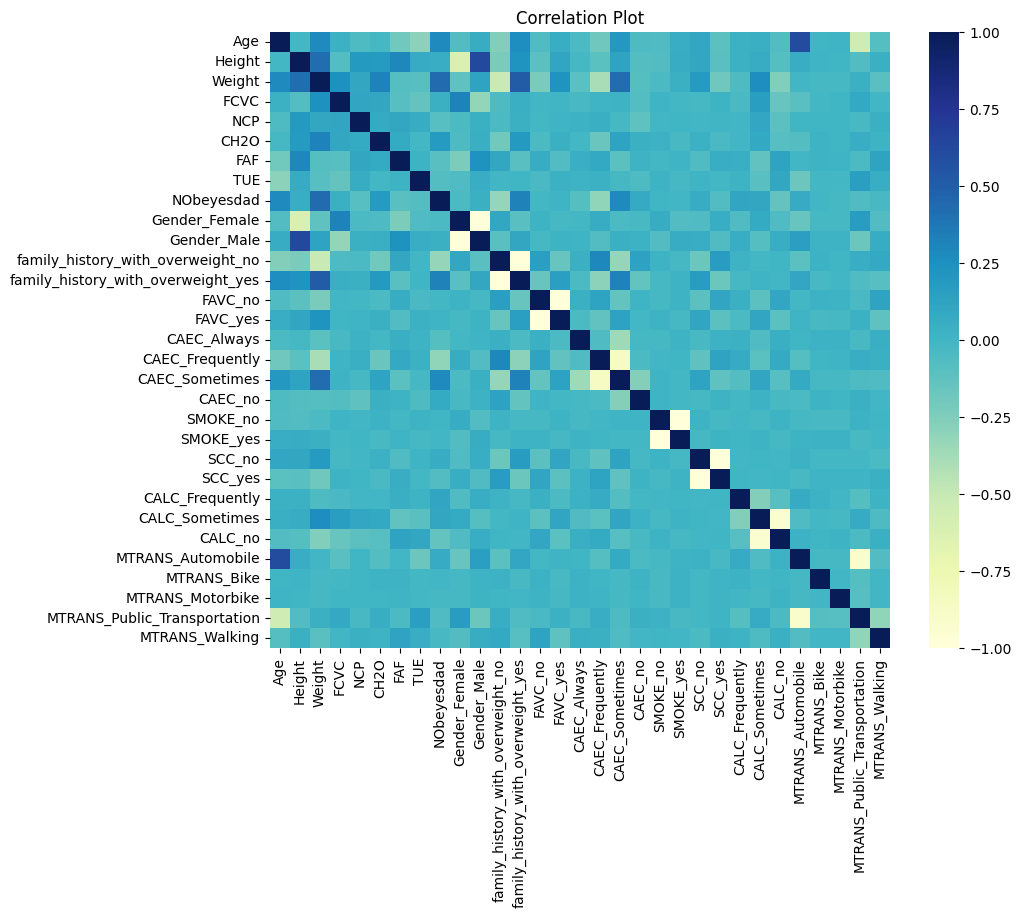

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Plot')
plt.show()


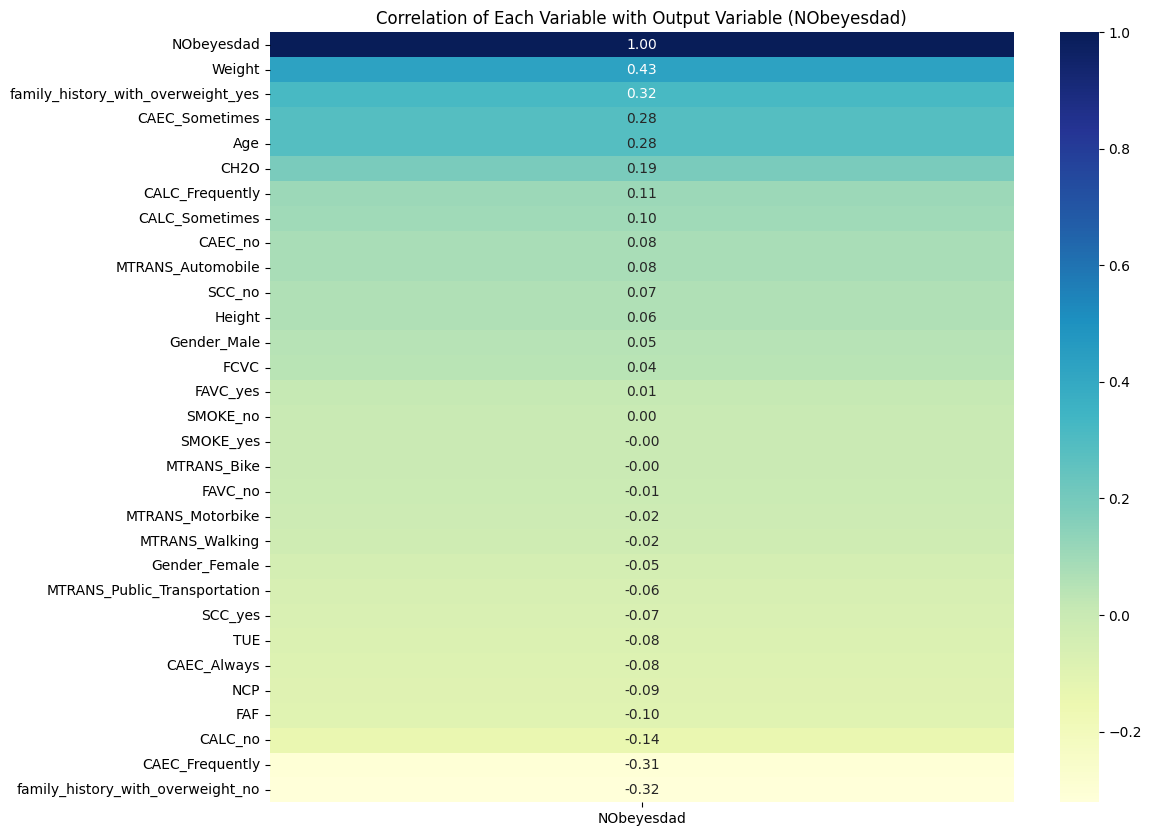

In [7]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['NObeyesdad']].sort_values(by='NObeyesdad', ascending=False), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation of Each Variable with Output Variable (NObeyesdad)')
plt.show()

### Plot the frequency distribution of output variable

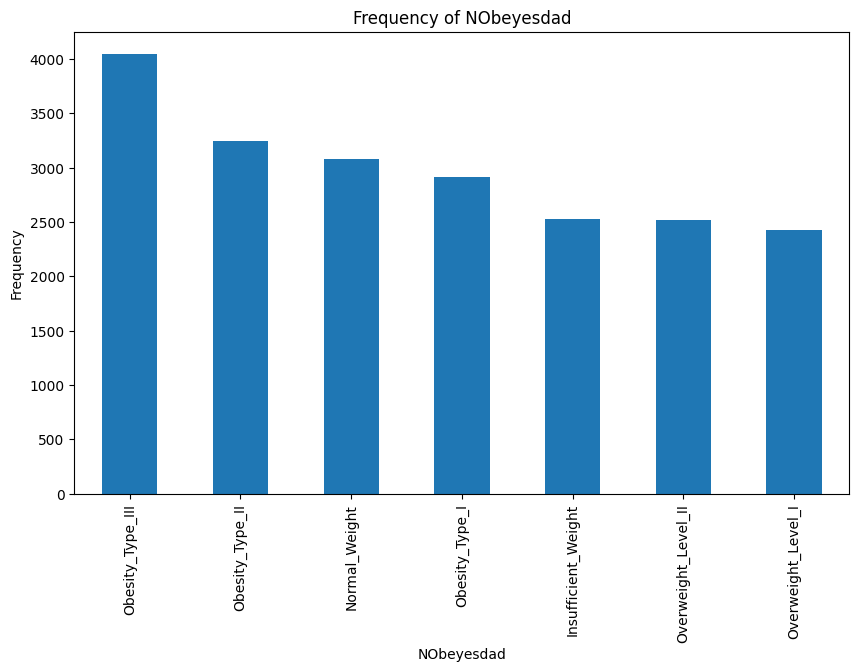

In [8]:
value_counts = train['NObeyesdad'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Frequency of NObeyesdad')
plt.xlabel("NObeyesdad")
plt.ylabel('Frequency')
plt.show()

### Preparing data for Neural Network

In [9]:
# Split features and target variable
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [10]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,True,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,False,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,False,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,False,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,False,True,...,True,False,False,True,False,False,False,False,True,False
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,False,True,...,True,False,False,False,True,False,False,False,True,False
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,False,True,...,True,False,False,False,True,True,False,False,False,False


In [11]:
X.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [12]:
y

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int64

In [13]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train

X

array([[ 0.10569857, -0.00282826, -0.23571264, ..., -0.04282496,
         0.49392547, -0.15170738],
       [-1.0270519 , -1.60629083, -1.17093118, ..., -0.04282496,
        -2.02459697, -0.15170738],
       [-1.0270519 ,  0.12845138, -1.43001211, ..., -0.04282496,
         0.49392547, -0.15170738],
       ...,
       [-0.65766899,  1.36653688,  0.6707173 , ..., -0.04282496,
         0.49392547, -0.15170738],
       [ 1.76006735, -0.00280536, -0.16557441, ..., -0.04282496,
        -2.02459697, -0.15170738],
       [ 0.49905134,  1.33206194,  1.14664506, ..., -0.04282496,
         0.49392547, -0.15170738]])

In [14]:
X.shape[1]

30

## Building and Training the network

### Define network layers

In [15]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X.shape[1],)),
    
    Dense(128, activation='relu'),
    
    Dense(256, activation='relu'),
    
    Dense(128, activation='relu'),
    
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
    
    Dense(16, activation='relu'),
    
    Dense(len(df['NObeyesdad'].unique()), activation='softmax')  # Output layer with softmax activation

])

# Compile the model
optimizer = Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# # Define the neural network model
# model = Sequential([
    
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    
#     Dense(128, activation='relu'),
# #     Dropout(0.05),

#     Dense(256, activation='relu'),
# #     Dropout(0.1),
    
#     Dense(512, activation='relu'),
    
#     Dense(256, activation='relu'),
    
#     Dense(128, activation='relu'),

#     Dense(64, activation='relu'),
    
#     Dense(32, activation='relu'),

#     Dense(16, activation='relu'),

    
#     Dense(len(df['NObeyesdad'].unique()), activation='softmax')  # Output layer with softmax activation
# ])


# # Define the optimizer 
# optimizer = Adam()

# # Compile the model with the optimizer
# model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

### Training the model with input data

In [16]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)


### Training The model with K-fold cross validation

In [17]:
# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y[train_index], y[val_index]
    print("---------------------------------------------------------------")
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    optimizer.learning_rate.assign(0.0005)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    optimizer.learning_rate.assign(0.00001)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#     optimizer.learning_rate.assign(0.000001)
#     model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

#     optimizer.learning_rate.assign(0.0000001)
#     model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    

---------------------------------------------------------------
(16606, 30)
(4152, 30)
(16606,)
(4152,)
Epoch 1/10
519/519 [==============================] - 3s 4ms/step - loss: 0.8877 - accuracy: 0.6481 - val_loss: 0.4462 - val_accuracy: 0.8413
Epoch 2/10
519/519 [==============================] - 2s 3ms/step - loss: 0.4584 - accuracy: 0.8298 - val_loss: 0.4244 - val_accuracy: 0.8432
Epoch 3/10
519/519 [==============================] - 2s 4ms/step - loss: 0.4362 - accuracy: 0.8390 - val_loss: 0.4431 - val_accuracy: 0.8360
Epoch 4/10
519/519 [==============================] - 2s 3ms/step - loss: 0.4217 - accuracy: 0.8472 - val_loss: 0.4037 - val_accuracy: 0.8540
Epoch 5/10
519/519 [==============================] - 2s 3ms/step - loss: 0.4074 - accuracy: 0.8537 - val_loss: 0.3894 - val_accuracy: 0.8601
Epoch 6/10
519/519 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy: 0.8535 - val_loss: 0.4011 - val_accuracy: 0.8603
Epoch 7/10
519/519 [========================

In [18]:
# Train the model

# optimizer.learning_rate.assign(0.0005)
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# optimizer.learning_rate.assign(0.00001)
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# optimizer.learning_rate.assign(0.000005)
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# optimizer.learning_rate.assign(0.00005)
# model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



### Evaluate model on test dataset

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Test Accuracy: {accuracy}')

649/649 [==============================] - 1s 2ms/step - loss: 0.2131 - accuracy: 0.9266
Test Accuracy: 0.9266306757926941


In [20]:
predictions = model.predict(X_test)
predictions


130/130 [==============================] - 0s 2ms/step


array([[9.5973319e-06, 1.4330098e-07, 7.1780203e-04, ..., 9.9927187e-01,
        8.7802321e-11, 1.8254669e-07],
       [4.0729591e-03, 9.6269447e-01, 1.5681083e-03, ..., 6.9164898e-04,
        2.7583020e-02, 3.3780059e-03],
       [1.0394024e-06, 4.5971515e-09, 3.6192246e-04, ..., 9.9963701e-01,
        5.0421305e-13, 1.2371349e-08],
       ...,
       [2.4009404e-04, 1.3459248e-02, 6.9304705e-03, ..., 7.0214221e-05,
        4.6515834e-01, 5.1411879e-01],
       [1.8119732e-05, 6.2355052e-06, 9.7411990e-01, ..., 1.2764707e-04,
        1.2571405e-05, 2.5998412e-03],
       [3.5173365e-05, 5.7757044e-13, 1.6162153e-03, ..., 8.7229942e-05,
        3.9189051e-13, 2.3158875e-06]], dtype=float32)

In [21]:
output = [0] * len(predictions)
for i in range(len(predictions)):
    output[i] = np.argmax(predictions[i]) 
    
# print first 100 values of the output
print(output[0:100])

# output = label_encoder.inverse_transform(output)

[4, 1, 4, 6, 0, 2, 0, 5, 0, 0, 6, 6, 0, 4, 3, 5, 4, 1, 4, 0, 1, 5, 6, 5, 6, 4, 1, 1, 2, 1, 6, 1, 6, 3, 2, 5, 2, 5, 4, 2, 6, 1, 1, 1, 3, 5, 4, 2, 5, 3, 3, 5, 1, 3, 1, 1, 5, 1, 1, 2, 3, 3, 4, 0, 6, 3, 1, 6, 4, 4, 4, 5, 1, 4, 1, 4, 6, 6, 5, 5, 1, 2, 1, 4, 5, 4, 1, 4, 3, 4, 0, 1, 5, 5, 3, 3, 3, 1, 0, 5]


## Visualizing the results

### 1. Correlation Matrix

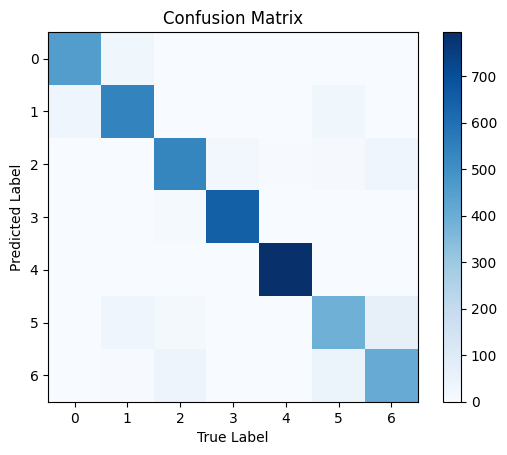

In [22]:
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
cm = confusion_matrix(y_test, output)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### 2. Classification Report

In [23]:
# Classification Report
class_report = classification_report(y_test, output)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       484
           1       0.89      0.89      0.89       607
           2       0.89      0.88      0.89       604
           3       0.97      0.98      0.97       660
           4       0.99      1.00      1.00       798
           5       0.82      0.77      0.80       505
           6       0.80      0.82      0.81       493

    accuracy                           0.91      4151
   macro avg       0.90      0.90      0.90      4151
weighted avg       0.91      0.91      0.91      4151



### 3. ROC Curve

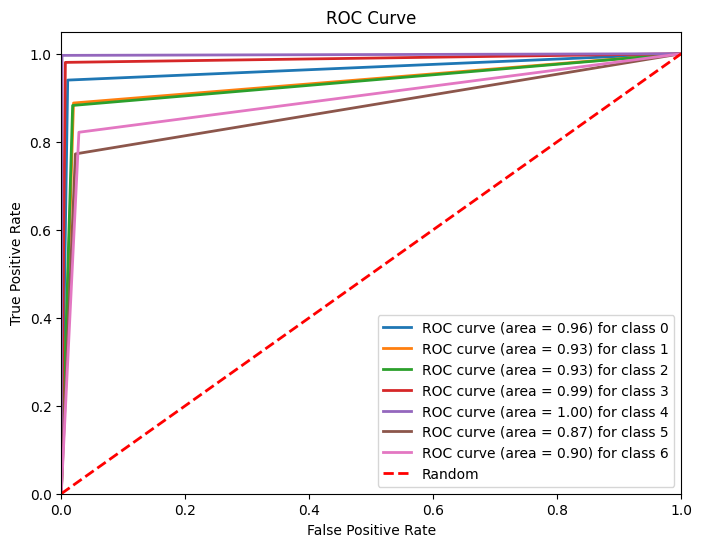

In [24]:
# ROC Curve
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
output_bin = label_binarize(output, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], output_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Making Predictions on Test Dataset

In [25]:
test_df = test

# Remove id
test_df = test_df.drop(['id'], axis=1)
test_df['CALC'] = test_df['CALC'].replace('Always', 'Frequently')
# Convert categorical variables to numerical variables using one-hot encoding
test_df = pd.get_dummies(test_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])
test_df.head()

# Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
#        'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
#        'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
#        'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
#        'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
#        'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
#        'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
#       dtype='object')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,True,False,...,True,False,False,True,False,False,False,False,True,False
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,True,False,...,True,False,False,True,False,False,False,False,True,False
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,False,True,...,True,False,False,True,False,False,False,False,True,False
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,True,False,...,True,False,False,True,False,False,False,False,True,False


In [26]:
test_df.columns

# Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
#        'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
#        'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
#        'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
#        'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
#        'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
#        'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
#       dtype='object')

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [27]:
X = scaler.transform(test_df)


In [28]:
test_predictions = model.predict(X)
test_predictions

433/433 [==============================] - 1s 2ms/step


array([[2.3836245e-05, 2.4237060e-13, 1.5913994e-03, ..., 8.4589788e-05,
        1.2556597e-13, 9.3226407e-07],
       [1.7899547e-05, 1.2529789e-03, 1.4944698e-02, ..., 2.2359036e-05,
        9.8186308e-01, 1.8945870e-03],
       [9.0289777e-06, 1.2882376e-07, 6.3221430e-04, ..., 9.9935824e-01,
        7.2096683e-11, 1.5942663e-07],
       ...,
       [9.1782045e-01, 8.1380211e-02, 3.6173999e-05, ..., 2.3109842e-05,
        7.2006823e-04, 1.7820372e-05],
       [2.5603327e-01, 7.4167228e-01, 1.3303469e-04, ..., 5.3522581e-05,
        1.4142621e-03, 6.7674601e-04],
       [1.1920302e-05, 8.2985363e-14, 1.1373792e-03, ..., 2.4427636e-05,
        6.4640527e-14, 1.1532258e-06]], dtype=float32)

In [29]:
output = [0] * len(test_predictions)
for i in range(len(test_predictions)):
    output[i] = np.argmax(test_predictions[i]) 
    
# print first 100 values of the output
print(output[0:100])

# inverse transform encoded labels
output = label_encoder.inverse_transform(output)
print(output[0:100])


[3, 5, 4, 2, 4, 0, 0, 1, 6, 1, 0, 4, 4, 2, 4, 5, 2, 2, 4, 2, 1, 4, 4, 3, 5, 2, 3, 6, 0, 2, 6, 4, 2, 3, 5, 5, 2, 1, 0, 6, 3, 6, 3, 6, 1, 0, 6, 3, 2, 3, 3, 4, 4, 4, 3, 1, 0, 5, 3, 4, 5, 3, 3, 3, 1, 3, 1, 0, 3, 1, 3, 4, 3, 4, 2, 6, 3, 2, 4, 1, 3, 3, 0, 4, 0, 4, 0, 1, 1, 1, 6, 6, 0, 1, 4, 4, 0, 3, 1, 2]
['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Obesity_Type_III' 'Insufficient_Weight'
 'Insufficient_Weight' 'Normal_Weight' 'Overweight_Level_II'
 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_I' 'Normal_Weight' 'Obesity_Type_III' 'Obesity_Type_III'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_II' 'Insufficient_Weight' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_II' 'Overweight_Level_I' 'Overweight_Level_I'
 '

## Submitting predicted results 

In [30]:
# Create DataFrame submission
submission = pd.DataFrame({'id': test['id'], 'NObeyesdad': output})

# Display the first few rows of the submission DataFrame
print(submission.head())

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [31]:
# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)
